# Gathering the Dataset

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from tqdm import tqdm
import os

In [2]:
train_features = pd.read_csv("train_features.csv", index_col="id")
test_features = pd.read_csv("test_features.csv", index_col="id")
train_labels = pd.read_csv("train_labels.csv", index_col="id")

In [3]:
train_features.head()

,filepath,site
id,,
ZJ000000,train_features/ZJ000000.jpg,S0120
ZJ000001,train_features/ZJ000001.jpg,S0069
ZJ000002,train_features/ZJ000002.jpg,S0009
ZJ000003,train_features/ZJ000003.jpg,S0008
ZJ000004,train_features/ZJ000004.jpg,S0036


In [4]:
train_features.shape

(16488, 2)

In [5]:
test_features.head()

,filepath,site
id,,
ZJ016488,test_features/ZJ016488.jpg,S0082
ZJ016489,test_features/ZJ016489.jpg,S0040
ZJ016490,test_features/ZJ016490.jpg,S0040
ZJ016491,test_features/ZJ016491.jpg,S0041
ZJ016492,test_features/ZJ016492.jpg,S0040


In [6]:
train_labels.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
species_labels = sorted(train_labels.columns.unique())
species_labels

['antelope_duiker',
 'bird',
 'blank',
 'civet_genet',
 'hog',
 'leopard',
 'monkey_prosimian',
 'rodent']

# Explore the Data

In [8]:
train_labels.sum().sort_values(ascending=False)

monkey_prosimian    2492.0
antelope_duiker     2474.0
civet_genet         2423.0
leopard             2254.0
blank               2213.0
rodent              2013.0
bird                1641.0
hog                  978.0
dtype: float64

In [9]:
train_labels.sum().divide(train_labels.shape[0]).sort_values(ascending=False)

monkey_prosimian    0.151140
antelope_duiker     0.150049
civet_genet         0.146955
leopard             0.136705
blank               0.134219
rodent              0.122089
bird                0.099527
hog                 0.059316
dtype: float64

# SPLIT INTO TRAIN AND EVALUATION SETS

In [10]:
from sklearn.model_selection import train_test_split

# Reset the indices of train_features and train_labels
train_features.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)

y = train_labels
x = train_features.loc[y.index].filepath.to_frame()

# note that we are casting the species labels to an indicator/dummy matrix
x_train, x_val, y_train, y_val = train_test_split(
    x, y, stratify=y, test_size=0.20
)

In [11]:
x_train

,filepath
13316,train_features/ZJ013316.jpg
15872,train_features/ZJ015872.jpg
3076,train_features/ZJ003076.jpg
8303,train_features/ZJ008303.jpg
12224,train_features/ZJ012224.jpg
...,...
12773,train_features/ZJ012773.jpg
3850,train_features/ZJ003850.jpg
4480,train_features/ZJ004480.jpg
13518,train_features/ZJ013518.jpg


In [12]:
y_train

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
13316,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15872,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3076,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8303,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12224,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
12773,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3850,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13518,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((13190, 1), (13190, 8), (3298, 1), (3298, 8))

Next, let's validate that our split has resulted in roughly similar relative distributions of species across the train and eval sets (because of how we passed stratify=y above).

In [14]:
import numpy as np
split_pcts = pd.DataFrame(
    {
        "train": y_train.idxmax(axis=1).value_counts(normalize=True),
        "eval": y_val.idxmax(axis=1).value_counts(normalize=True),
    }
)
print("Species percentages by split")
print((split_pcts.fillna(0) * 100).astype(int).applymap(lambda x: f"{x}%" if not np.isnan(x) else ""))

Species percentages by split
                 train eval
monkey_prosimian   15%  15%
antelope_duiker    15%  15%
civet_genet        14%  14%
leopard            13%  13%
blank              13%  13%
rodent             12%  12%
bird                9%   9%
hog                 5%   5%


/tmp/ipykernel_1664/4081644741.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print((split_pcts.fillna(0) * 100).astype(int).applymap(lambda x: f"{x}%" if not np.isnan(x) else ""))


# Build The Model

Now we can start building our model.

## The Dataset
First, we'll create an ImagesDataset class that will define how we access our data and any transformations we might want to apply.

This new class will inherit from the PyTorch Dataset class, but we'll also need to define our own __init__, __len__ and __getitem__ special methods:

1. __init__ will instantiate the dataset object with two dataframes: an x_train df containing image IDs and image file paths, and a y_train df containing image IDs and labels. This will run once when we first create the dataset object, e.g. with dataset = ImagesDataset(x_train, y_train).
2. __getitem__ will define how we access a sample from the data. This method gets called whenever we use an indexing operation like dataset[index]. In this case, whenever accessing a particular image sample (for example, to get the first image we'd do dataset[0]) the following will happen:
* look up the image filepath using the index
* load the image with PIL.Image
* apply some transformations (more on this below)
* return a dictionary containing the image ID, the image itself as a Tensor, and a label (if it exists)
3. __len__ simply returns the size of the dataset, which we do by calling len on the input dataframe.

In [15]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os

# Define your dataset class
class ImagesDataset(Dataset):
    def __init__(self, x_df, y_df=None):
        self.data = x_df
        self.label = y_df
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p=1),
            transforms.RandomAdjustSharpness(sharpness_factor=2),
            transforms.RandomPerspective(distortion_scale=0.3, p=0.5),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        # Define the path to the directory containing images
        self.image_dir = 'data'

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx]["filepath"]  # Assuming filepath is the column name
        img_path = os.path.join(self.image_dir, img_name)  # Construct the full image path
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        image_id = self.data.index[idx]
        if self.label is None:
            sample = {"image_id": image_id, "image": image}
        else:
            label = torch.tensor(self.label.iloc[idx].values, dtype=torch.float)
            sample = {"image_id": image_id, "image": image, "label": label}
        return sample

    def __len__(self):
        return len(self.data)

In [16]:
# Use GPU for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

Notice that we are also defining a set of transformations, which are defined in the __init__ and called in the __getitem__ special methods. These are applied to each image before returning it. Here's what each of those transformations do and why:

* transforms.Resize((224, 224)) ResNet50 was trained on images of size 224x224 so we resize to the same dimensions here. See pytorch docs and the ResNet paper.
* transforms.ToTensor() converts the image to a tensor. Since we are passing in a PIL Image at this point, PyTorch can recognize it as an RGB image and will automatically convert the input values which are in the range [0, 255] to a range of [0, 1]. See more from the PyTorch docs.
* transforms.Normalize(...) normalizes the image tensors using the mean and standard deviation of ImageNet images. Because this transformation was applied to images when training the ResNet model, we want to do the same here with our images. See more from the PyTorch docs on pretrained models.

# The DataLoader
Next, we need to load the dataset into a dataloader. The DataLoader class lets us iterate through our dataset in batches.

In [17]:
from torch.utils.data import DataLoader
# Create data loaders
train_dataset = ImagesDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=64, num_workers=10)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Training the Model (DenseNet-121)

Now it's time to start building our model and then training it.

We'll use a pretrained ResNet50 model as our backbone. ResNets are one of the more popular networks for image classification tasks. The pretrained model outputs a 2048-dimension embedding, which we will then connect to two more dense layers, with a ReLU and Dropout step in between.

These final layers, defined in model.fc, are the new "head" of our model, and allow us to transform the image embeddings produced by the pretrained "backbone" into the 8-dimensional output required to learn the species classification task we're tackling here. Prior to redefining it below, model.fc would be the final, dense layer connecting the 2048-dimension embedding to a 1000-dimension output (corresponding to the 1000 ImageNet classes that the pretrained model was trained on). We will instead prepare the model for the current task by redefining model.fc to produce an 8-dimensional output corresponding to our 8 species classes (including blanks).

We'll also add a couple more layers in between. The ReLU layer introduces non-linearity into the model head, in effect activating important features and suppressing noise. And the Dropout layer is a commonly used regularization component that randomly drops some nodes from the previous layer's outputs (10% of nodes in this case) during each training step, mitigating our risk of overfitting.

In [18]:
from torch import nn
import torchvision.models as models

# Define the model
model = models.densenet121(pretrained=True).to(device)

# Modify the fully connected layers (model.classifier)
model.classifier = nn.Sequential(
    nn.Linear(1024, 512),  # Adjusted input size to match the output size of the preceding layer
    nn.ReLU(inplace=True),  # Add ReLU activation function
    nn.Dropout(0.3),         # Add dropout layer with a dropout probability of 0.3
    nn.Linear(512, 8),       # Adjusted input size to match the output size of the previous layer
).to(device)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Define our loss function

In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model


In [20]:
import matplotlib.pyplot as plt

num_epochs = 20
training_losses = []  # To collect the loss for each epoch

for epoch in range(num_epochs):
    model.train()
    training_loss = 0.0
    with tqdm(total=len(train_dataloader), desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch') as progress_bar:
        for batch_n, batch in enumerate(train_dataloader):
            inputs, labels = batch['image'].to(device), batch['label'].to(device)  # Move data to GPU
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            training_loss += loss.item()
            progress_bar.set_postfix({'Loss': training_loss / (len(train_dataloader) + 1e-9)})
            progress_bar.update()

            # Append the training loss to the list with the custom index
            training_losses.append((epoch, training_loss / (batch_n + 1)))  # Append tuple (epoch, loss)

# Convert training_losses to a pandas DataFrame
tracking_loss_df = pd.DataFrame(training_losses, columns=['Epoch', 'Loss'])

Epoch 1/20:   1%|          | 2/207 [00:05<08:12,  2.40s/batch, Loss=0.0202]/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with an OutOfMemoryError: CUDA out of memory. Tried to allocate 256.00 MiB. GPU  (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:924.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Epoch 20/20: 100%|██████████| 207/207 [02:07<00:00,  1.62batch/s, Loss=0.0873]


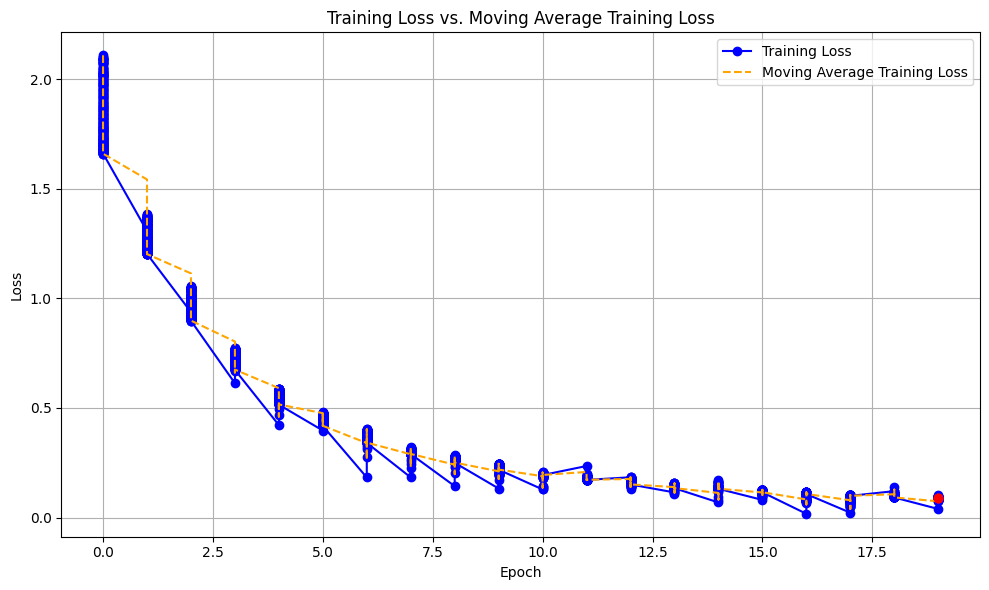

In [21]:
import matplotlib.pyplot as plt

# Calculate moving average of training loss over each epoch
window_size = 3
tracking_loss_df['Moving Average Loss'] = tracking_loss_df['Loss'].rolling(window=window_size, min_periods=1).mean()

# Plotting the comparison plot
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(tracking_loss_df['Epoch'], tracking_loss_df['Loss'], label='Training Loss', marker='o', color='blue')

# Plot moving average training loss
plt.plot(tracking_loss_df['Epoch'], tracking_loss_df['Moving Average Loss'], label='Moving Average Training Loss', linestyle='--', color='orange')

# Highlight the last few points for clarity
plt.scatter(tracking_loss_df['Epoch'][-window_size:], tracking_loss_df['Moving Average Loss'][-window_size:], color='red', zorder=5)

# Adding labels, title, legend, and grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Moving Average Training Loss')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [22]:
tracking_loss_df

,Epoch,Loss,Moving Average Loss
0,0,2.108417,2.108417
1,0,2.090070,2.099244
2,0,2.098248,2.098912
3,0,2.098414,2.095577
4,0,2.095178,2.097280
...,...,...,...
4135,19,0.087220,0.087187
4136,19,0.087077,0.087160
4137,19,0.087451,0.087249
4138,19,0.087655,0.087394


Now let's plot the loss by epoch and batch. The x-axis here is a tuple of (epoch, batch).

# Save the model
We have the model loaded in memory already, so we don't really need to save the model, but it's often useful to do this so we can use it again later.

Here's how:

In [34]:
torch.save(model, "DenseNetmodel.pth")

# Evaluation
So far, not so bad. We've shown an improvement in the loss on the training set, but that tells us little about how our model will do on new data. Let's reload our saved model and try generating some predictions on the evaluation split we created earlier.

In [35]:
loaded_model = torch.load("DenseNetmodel.pth")

In [36]:
from torch.utils.data import DataLoader

eval_dataset = ImagesDataset(x_val, y_val)
eval_dataloader = DataLoader(eval_dataset, batch_size=64, num_workers = 10 )

# Make Predictions
We'll iterate through the eval dataloader in batches, just like we did for training, but this time we aren't going to need to compute gradients or update weights. For each batch, we'll do the following:

1. Run the forward pass to get the model output or logits
2. Apply a softmax function to convert the logits into probability space with range[0,1]. During training, the softmax operation was handled internally by nn.CrossEntropyLoss. We aren't computing the loss now because we are just doing evaluation, but we still want the predictions to be in the range[0,1].
3. Store the results in a dataframe for further analysis

In [37]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# List to store average validation losses for each epoch
epoch_losses = []
num_epochs = 20

# Loop over epochs and perform validation
for epoch in range(num_epochs):
    model.eval()  # Set the model to evaluation mode

    losses = []  # List to store loss values
    preds_collector = []  # List to collect predictions

    # Create a tqdm progress bar
    progress_bar = tqdm(enumerate(eval_dataloader), total=len(eval_dataloader), desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch')
    
    # Disable gradient calculation during validation
    with torch.no_grad():
        for i, batch in progress_bar:
            # Move batch to device
            batch = {key: value.to(device) for key, value in batch.items()}

            # Forward pass: compute logits
            logits = model(batch["image"])

            # Compute the loss
            loss = criterion(logits, batch["label"])
            losses.append(loss.item())  # Append loss value to list

            # Apply softmax to get probabilities
            preds = nn.functional.softmax(logits, dim=1)

            # Store predictions in a DataFrame
            preds_df = pd.DataFrame(
                preds.cpu().detach().numpy(),
                index=batch["image_id"].cpu().numpy(),
                columns=species_labels,
            )
            preds_collector.append(preds_df)

            # Update progress bar description with batch loss
            progress_bar.set_postfix({'Batch Loss': loss.item()}, refresh=True)

    # Calculate average validation loss for the epoch
    avg_val_loss = sum(losses) / len(losses)
    epoch_losses.append(avg_val_loss)  # Append average validation loss to epoch_losses list
    print(f'Epoch {epoch+1}: Average Validation Loss: {avg_val_loss}')

    # Concatenate predictions from all batches
    eval_preds_df_D = pd.concat(preds_collector)

Epoch 1/20: 100%|██████████| 52/52 [00:13<00:00,  3.78batch/s, Batch Loss=0.354]

Epoch 1: Average Validation Loss: 0.4608170473231719



Epoch 2/20: 100%|██████████| 52/52 [00:13<00:00,  3.84batch/s, Batch Loss=0.384]

Epoch 2: Average Validation Loss: 0.4501443976679674



Epoch 3/20: 100%|██████████| 52/52 [00:13<00:00,  3.75batch/s, Batch Loss=0.512]

Epoch 3: Average Validation Loss: 0.4517723940885984



Epoch 4/20: 100%|██████████| 52/52 [00:13<00:00,  3.83batch/s, Batch Loss=0.439]

Epoch 4: Average Validation Loss: 0.44225056297503984



Epoch 5/20: 100%|██████████| 52/52 [00:13<00:00,  3.81batch/s, Batch Loss=0.48] 

Epoch 5: Average Validation Loss: 0.45115250836198145



Epoch 6/20: 100%|██████████| 52/52 [00:13<00:00,  3.78batch/s, Batch Loss=0.337]

Epoch 6: Average Validation Loss: 0.4570450605108188



Epoch 7/20: 100%|██████████| 52/52 [00:13<00:00,  3.82batch/s, Batch Loss=0.416]

Epoch 7: Average Validation Loss: 0.4636015079628963



Epoch 8/20: 100%|██████████| 52/52 [00:13<00:00,  3.83batch/s, Batch Loss=0.468] 

Epoch 8: Average Validation Loss: 0.427128798686541



Epoch 9/20: 100%|██████████| 52/52 [00:13<00:00,  3.83batch/s, Batch Loss=0.361]

Epoch 9: Average Validation Loss: 0.4369189426876031



Epoch 10/20: 100%|██████████| 52/52 [00:13<00:00,  3.82batch/s, Batch Loss=0.281]

Epoch 10: Average Validation Loss: 0.4355501440855173



Epoch 11/20: 100%|██████████| 52/52 [00:13<00:00,  3.85batch/s, Batch Loss=0.566] 

Epoch 11: Average Validation Loss: 0.4428995968773961



Epoch 12/20: 100%|██████████| 52/52 [00:13<00:00,  3.78batch/s, Batch Loss=0.483]

Epoch 12: Average Validation Loss: 0.44617815802876765



Epoch 13/20: 100%|██████████| 52/52 [00:13<00:00,  3.79batch/s, Batch Loss=0.372]

Epoch 13: Average Validation Loss: 0.45484285715680856



Epoch 14/20: 100%|██████████| 52/52 [00:13<00:00,  3.79batch/s, Batch Loss=0.335]

Epoch 14: Average Validation Loss: 0.4342238304133599



Epoch 15/20: 100%|██████████| 52/52 [00:13<00:00,  3.79batch/s, Batch Loss=0.509] 

Epoch 15: Average Validation Loss: 0.44717842440765637



Epoch 16/20: 100%|██████████| 52/52 [00:13<00:00,  3.83batch/s, Batch Loss=0.358]

Epoch 16: Average Validation Loss: 0.43950134343825853



Epoch 17/20: 100%|██████████| 52/52 [00:13<00:00,  3.77batch/s, Batch Loss=0.391]

Epoch 17: Average Validation Loss: 0.44005324892126596



Epoch 18/20: 100%|██████████| 52/52 [00:13<00:00,  3.83batch/s, Batch Loss=0.422]

Epoch 18: Average Validation Loss: 0.4613425051077054



Epoch 19/20: 100%|██████████| 52/52 [00:13<00:00,  3.78batch/s, Batch Loss=0.476]

Epoch 19: Average Validation Loss: 0.44317079808276433



Epoch 20/20: 100%|██████████| 52/52 [00:13<00:00,  3.87batch/s, Batch Loss=0.389]

Epoch 20: Average Validation Loss: 0.44477193917219454


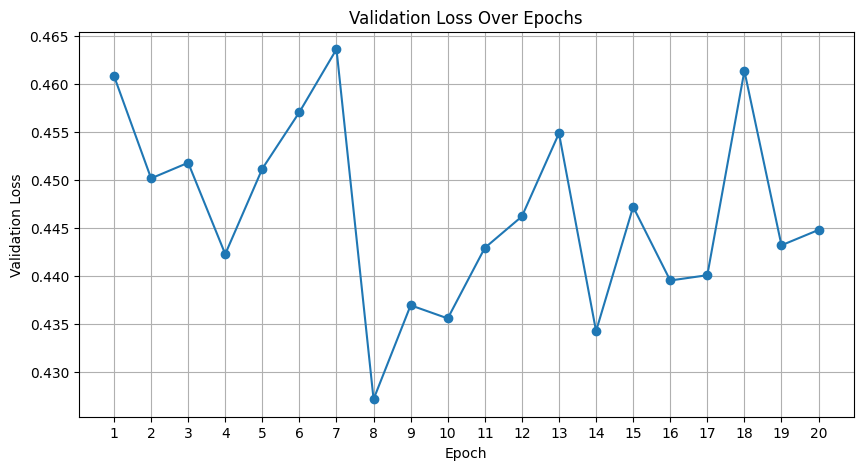

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting validation loss over each epoch
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', linestyle='-')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.grid(True)
plt.xticks(range(1, num_epochs + 1))  # Set x-axis ticks to show each epoch
plt.show()

In [39]:
eval_preds_df_D

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
3751,8.027658e-04,0.000105,0.119740,3.706550e-02,5.725158e-05,0.000029,0.000019,8.421813e-01
680,2.855555e-06,0.000006,0.000021,8.996275e-05,2.058462e-05,0.999857,0.000003,8.236897e-08
3647,1.454220e-02,0.012908,0.071472,7.316450e-05,2.810043e-05,0.000005,0.488701,4.122708e-01
12173,3.422134e-04,0.000313,0.000793,6.811293e-06,5.026063e-05,0.000086,0.998336,7.187634e-05
12077,1.899249e-07,0.999893,0.000018,3.799952e-07,1.312379e-09,0.000080,0.000009,3.654563e-07
...,...,...,...,...,...,...,...,...
10935,3.858591e-05,0.999703,0.000118,3.547731e-05,2.931480e-07,0.000040,0.000055,8.524750e-06
3952,1.915417e-04,0.993007,0.006672,1.340038e-06,4.626773e-08,0.000001,0.000040,8.770789e-05
3379,2.130724e-06,0.000025,0.000056,3.819362e-05,2.456710e-05,0.999851,0.000002,4.329972e-07
5573,9.967809e-01,0.000697,0.000750,1.280184e-04,8.892632e-05,0.000011,0.000989,5.556067e-04


In [40]:
import pandas as pd

# Assuming 'eval_preds_df' is your DataFrame
eval_preds_df_D.to_csv('eval_preds_Densenet-121.csv', index=False)

In [41]:
print("True labels (training):")
y_train.idxmax(axis=1).value_counts()

True labels (training):


monkey_prosimian    1994
antelope_duiker     1979
civet_genet         1938
leopard             1803
blank               1770
rodent              1610
bird                1313
hog                  783
Name: count, dtype: int64

In [42]:
print("Predicted labels (eval):")
eval_preds_df.idxmax(axis=1).value_counts()

Predicted labels (eval):


blank               1029
leopard              747
civet_genet          384
monkey_prosimian     344
antelope_duiker      328
rodent               189
bird                 163
hog                  114
Name: count, dtype: int64

In [43]:
print("True labels (eval):")
y_val.idxmax(axis=1).value_counts()

True labels (eval):


monkey_prosimian    498
antelope_duiker     495
civet_genet         485
leopard             451
blank               443
rodent              403
bird                328
hog                 195
Name: count, dtype: int64

## Comparison of Epoch Losses on Training,Validation and Testing Datasets

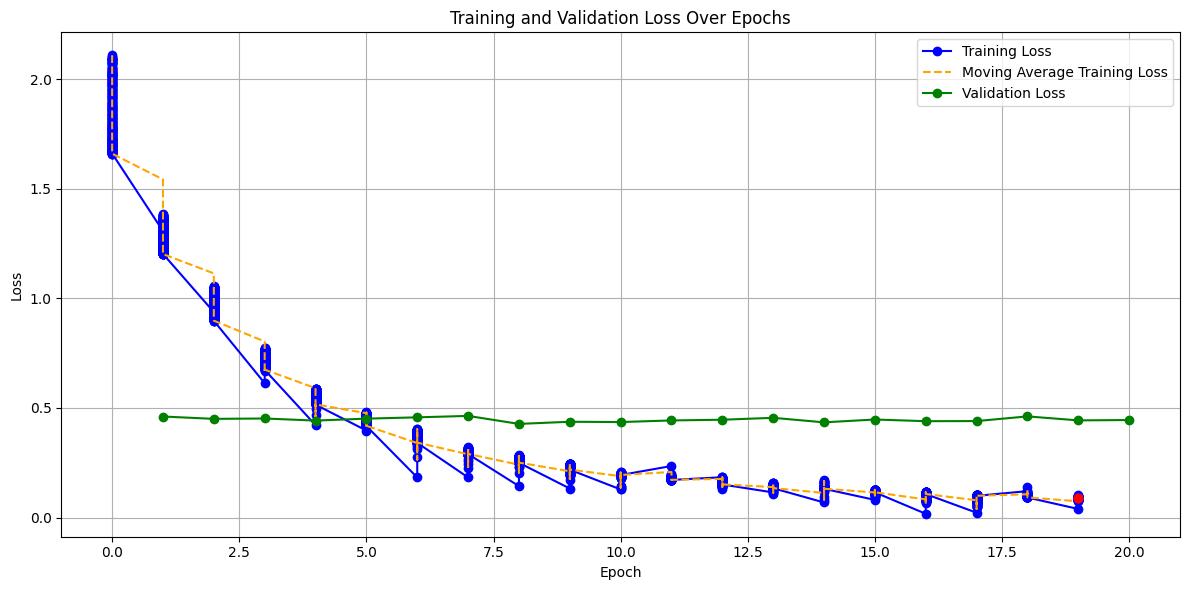

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate moving average of training loss over each epoch
window_size = 3
tracking_loss_df['Moving Average Loss'] = tracking_loss_df['Loss'].rolling(window=window_size, min_periods=1).mean()

# Plotting the comparison plot
plt.figure(figsize=(12, 6))

# Plot training loss
plt.plot(tracking_loss_df['Epoch'], tracking_loss_df['Loss'], label='Training Loss', marker='o', color='blue')

# Plot moving average training loss
plt.plot(tracking_loss_df['Epoch'], tracking_loss_df['Moving Average Loss'], label='Moving Average Training Loss', linestyle='--', color='orange')

# Highlight the last few points for clarity
plt.scatter(tracking_loss_df['Epoch'][-window_size:], tracking_loss_df['Moving Average Loss'][-window_size:], color='red', zorder=5)

# Plot validation loss
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', linestyle='-', label='Validation Loss', color='green')

# Adding labels, title, legend, and grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [45]:
from sklearn.metrics import log_loss

# True labels for ResNet-50
true_labels_resnet = y_val.values  # Assuming train_labels contains true labels

# Predicted probabilities for ResNet-50
predicted_probs_resnet = eval_preds_df_D.values  # Assuming eval_preds_df contains predicted probabilities

# Compute log loss for ResNet-50
log_loss_Densenet = log_loss(true_labels_resnet, predicted_probs_resnet)
print("Log Loss for DenseNet_121:", log_loss_Densenet)

Log Loss for DenseNet_121: 0.44392337788483693


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


# Accuracy

Now let's compute how accurate our model is and compare that against some trivial baseline models. First let's get the labels with the highest score for each image.

In [46]:
eval_predictions = eval_preds_df.idxmax(axis=1)
eval_predictions.head()

3751                blank
680               leopard
3647               rodent
12173    monkey_prosimian
12077                bird
dtype: object

In [47]:
eval_true = y_val.idxmax(axis=1)

accuracy_monkey_prosimian = (eval_true == "monkey_prosimian").sum() / len(eval_predictions)
accuracy_leopard = (eval_true == "leopard").sum() / len(eval_predictions)
accuracy_hog = (eval_true == "hog").sum() / len(eval_predictions)
accuracy_bird = (eval_true == "bird").sum() / len(eval_predictions)
accuracy_antelope_duiker = (eval_true == "antelope_duiker").sum() / len(eval_predictions)
accuracy_civet_genet = (eval_true == "civet_genet").sum() / len(eval_predictions)
accuracy_blank = (eval_true == "blank").sum() / len(eval_predictions)

print(f"Accuracy - Monkey Prosimian: {accuracy_monkey_prosimian:.4f}")
print(f"Accuracy - Leopard: {accuracy_leopard:.4f}")
print(f"Accuracy - Hog: {accuracy_hog:.4f}")
print(f"Accuracy - Bird: {accuracy_bird:.4f}")
print(f"Accuracy - Antelope Duiker: {accuracy_antelope_duiker:.4f}")
print(f"Accuracy - Civet Genet: {accuracy_civet_genet:.4f}")
print(f"Accuracy - Blank: {accuracy_blank:.4f}")

Accuracy - Monkey Prosimian: 0.1510
Accuracy - Leopard: 0.1367
Accuracy - Hog: 0.0591
Accuracy - Bird: 0.0995
Accuracy - Antelope Duiker: 0.1501
Accuracy - Civet Genet: 0.1471
Accuracy - Blank: 0.1343


In [48]:
eval_predictions = eval_preds_df.idxmax(axis=1)
eval_true = y_val.idxmax(axis=1)

# Reindex eval_true to match the labels of eval_predictions
eval_true = eval_true.reindex(index=eval_predictions.index)

correct = (eval_predictions == eval_true).sum()
accuracy = correct / len(eval_predictions)
accuracy

0.5848999393571862

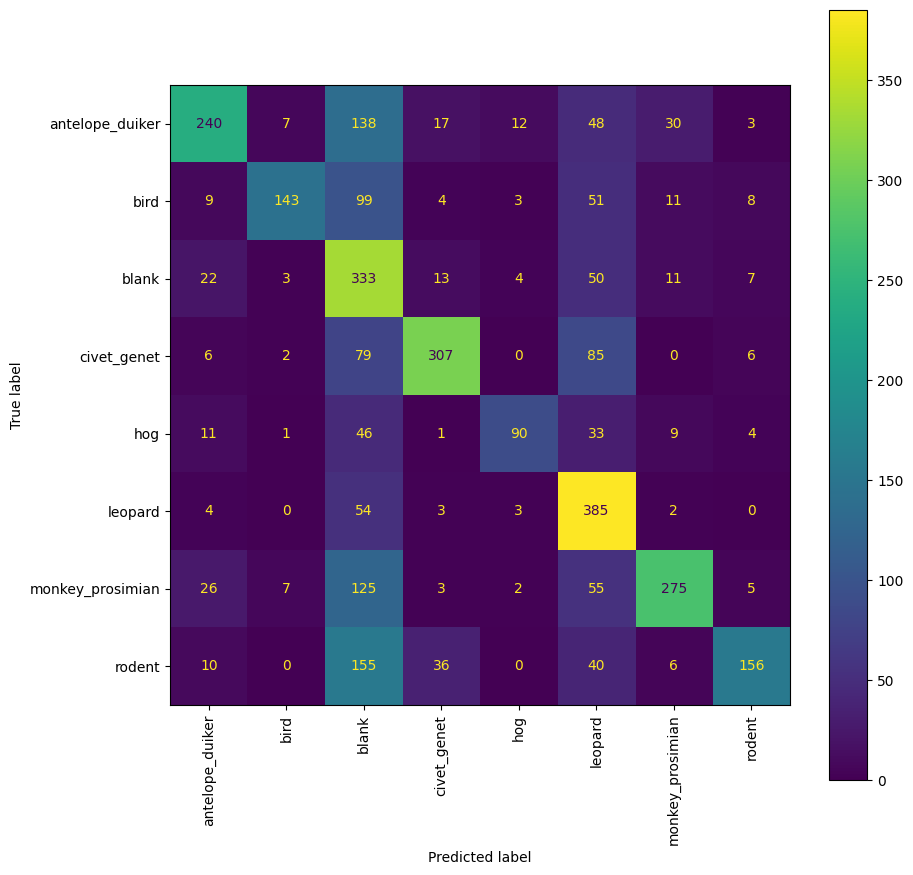

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = ConfusionMatrixDisplay.from_predictions(
    y_val.idxmax(axis=1),
    eval_preds_df.idxmax(axis=1),
    ax=ax,
    xticks_rotation=90,
    colorbar=True,
)

# Creat Submission

In [50]:
test_dataset = CustomDataset(test_features.filepath.to_frame())
test_dataloader = DataLoader(test_dataset, batch_size=32, num_workers = 10 )

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [51]:
# Put the model in evaluation mode
model.eval()

# List to collect predictions
preds_collector = []

# Iterate through the test dataloader
with torch.no_grad():
    for batch in tqdm(test_dataloader, total=len(test_dataloader)):
        # Move batch data to GPU
        batch["image"] = batch["image"].to(device)

        # Run the forward step
        logits = model.forward(batch["image"])

        # Apply softmax to get probabilities
        preds = nn.functional.softmax(logits, dim=1)

        # Store this batch's predictions in a DataFrame
        preds_df = pd.DataFrame(
            preds.cpu().detach().numpy(),  # Move predictions back to CPU for DataFrame creation
            index=batch["image_id"],  # Assuming batch["image_id"] contains image IDs
            columns=species_labels,
        )
        preds_collector.append(preds_df)

# Concatenate all predictions into one DataFrame
submission_df = pd.concat(preds_collector)

# Now you have your submission DataFrame containing predictions
submission_df

100%|██████████| 140/140 [00:15<00:00,  8.91it/s]


,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
ZJ016488,7.124859e-04,0.000746,0.827186,9.328192e-02,0.000010,0.076549,1.203915e-05,1.501563e-03
ZJ016489,4.489213e-01,0.004271,0.034768,1.852067e-02,0.002497,0.060755,4.299172e-01,3.503644e-04
ZJ016490,9.026420e-01,0.000945,0.018317,4.829017e-02,0.001203,0.000132,2.639168e-02,2.080268e-03
ZJ016491,1.125148e-06,0.000004,0.000055,1.035502e-03,0.000010,0.998892,9.322258e-07,8.759455e-07
ZJ016492,2.533623e-01,0.001384,0.010725,1.670579e-01,0.002716,0.001616,5.582221e-01,4.916638e-03
...,...,...,...,...,...,...,...,...
ZJ020947,1.206468e-01,0.207532,0.236613,2.892702e-05,0.000131,0.000080,4.310821e-01,3.886394e-03
ZJ020948,4.980124e-04,0.000461,0.986219,1.161560e-03,0.000093,0.004085,1.330484e-04,7.349422e-03
ZJ020949,1.397256e-03,0.000268,0.020455,7.562339e-01,0.000391,0.220825,5.269815e-05,3.782455e-04
ZJ020950,3.773544e-01,0.002507,0.612548,7.013805e-04,0.000274,0.002950,2.547146e-03,1.118838e-03


Let's check a couple things on submission_df before submitting to the platform. We'll want to make sure our submission's index and column labels match the submission format. (The DrivenData platform will do these data integrity checks as well, but it will be quicker to detect problems this way.)

In [52]:
def scientific_to_fixed(number_str, precision=8):
    try:
        # Convert the number from scientific notation to a float
        number = float(number_str)
        # Convert the float to a string with fixed formatting
        fixed_str = format(number, f'.{precision}f')
        return fixed_str
    except ValueError:
        # If the input is not a valid number, return it unchanged
        return number_str

# Apply scientific_to_fixed function to each element in submission_df
for column in submission_df.columns:
    submission_df[column] = submission_df[column].apply(scientific_to_fixed)

# Display the DataFrame with fixed-length numbers
print(submission_df)

         antelope_duiker        bird       blank civet_genet         hog  \
ZJ016488      0.00071249  0.00074634  0.82718617  0.09328192  0.00001026   
ZJ016489      0.44892129  0.00427069  0.03476776  0.01852067  0.00249699   
ZJ016490      0.90264195  0.00094480  0.01831688  0.04829017  0.00120272   
ZJ016491      0.00000113  0.00000402  0.00005538  0.00103550  0.00000985   
ZJ016492      0.25336233  0.00138353  0.01072545  0.16705789  0.00271631   
...                  ...         ...         ...         ...         ...   
ZJ020947      0.12064680  0.20753171  0.23661304  0.00002893  0.00013113   
ZJ020948      0.00049801  0.00046083  0.98621851  0.00116156  0.00009343   
ZJ020949      0.00139726  0.00026766  0.02045474  0.75623387  0.00039092   
ZJ020950      0.37735438  0.00250675  0.61254752  0.00070138  0.00027378   
ZJ020951      0.00000040  0.00000394  0.00001178  0.00000055  0.00000468   

             leopard monkey_prosimian      rodent  
ZJ016488  0.07654926       0.000012

In [ ]:
submission_format = pd.read_csv("submission_format.csv", index_col="id")

assert all(submission_df.index == submission_format.index)
assert all(submission_df.columns == submission_format.columns)

In [ ]:
submission_df.to_csv("submission_df_densenet121.csv")